In [2]:
import pandas as pd
import scipy
import numpy as np
%matplotlib inline

In [3]:
data_url = "https://raw.githubusercontent.com/alstat/Analysis-with-Programming/master/2014/Python/Numerical-Descriptions-of-the-Data/data.csv" 
df = pd.read_csv(data_url)

In [4]:
df.head()

,Abra,Apayao,Benguet,Ifugao,Kalinga
0,1243,2934,148,3300,10553
1,4158,9235,4287,8063,35257
2,1787,1922,1955,1074,4544
3,17152,14501,3536,19607,31687
4,1266,2385,2530,3315,8520


## 操作说明pandas数据缺失值处理

### reindex()

reindex()可改变/增加/删除指定轴上的索引，空缺值默认使用NaN代替

In [5]:
df.head().reindex([1,0,10])

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,4158.0,9235.0,4287.0,8063.0,35257.0
0,1243.0,2934.0,148.0,3300.0,10553.0
10,NaN,NaN,NaN,NaN,NaN


也可以利用fill_value参数指定替代值

In [6]:
df.head().reindex([1,0,10], fill_value='missing')

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,4158,9235,4287,8063,35257
0,1243,2934,148,3300,10553
10,missing,missing,missing,missing,missing


### dropna()

用于去掉包含缺失值的行

In [7]:
test = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
test

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [8]:
test.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


也可以设定为删除包含缺失值的列

In [9]:
test.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


去掉数据全部缺失的行

In [10]:
test.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


只保留至少含有指定阀值项的数据

In [11]:
test.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


指定在哪些列寻找缺失值

In [12]:
test.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


### fillna()

用于对缺失值进行填充

In [13]:
df.head().reindex([1,0,10]).fillna(5)

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,4158.0,9235.0,4287.0,8063.0,35257.0
0,1243.0,2934.0,148.0,3300.0,10553.0
10,5.0,5.0,5.0,5.0,5.0


也可以指定特定的方法

In [14]:
df.head().reindex([1,0,10]).fillna(method="ffill")

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,4158.0,9235.0,4287.0,8063.0,35257.0
0,1243.0,2934.0,148.0,3300.0,10553.0
10,1243.0,2934.0,148.0,3300.0,10553.0


限定每一列填充的数值

In [15]:
values = {'Abra': 0, 'Apayao': 1}
df.head().reindex([1,0,10]).fillna(value=values)

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,4158.0,9235.0,4287.0,8063.0,35257.0
0,1243.0,2934.0,148.0,3300.0,10553.0
10,0.0,1.0,NaN,NaN,NaN


### isnull()

根据数据是否存在，返回布尔数值的DataFrame

In [16]:
df.head().reindex([1,0,10]).isna()

,Abra,Apayao,Benguet,Ifugao,Kalinga
1,False,False,False,False,False
0,False,False,False,False,False
10,True,True,True,True,True


## Pandas中的可视化工具

In [17]:
data = df.head()
data

,Abra,Apayao,Benguet,Ifugao,Kalinga
0,1243,2934,148,3300,10553
1,4158,9235,4287,8063,35257
2,1787,1922,1955,1074,4544
3,17152,14501,3536,19607,31687
4,1266,2385,2530,3315,8520


### 折线图

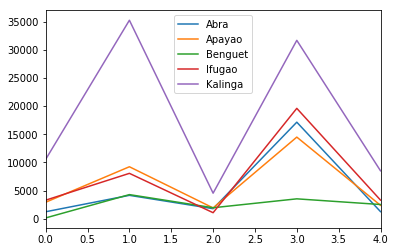

In [18]:
data.plot()

### 条形图

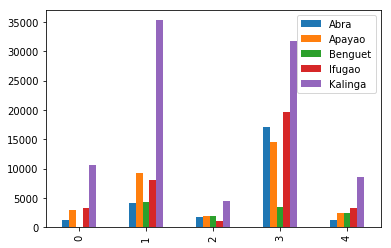

In [19]:
data.plot.bar()

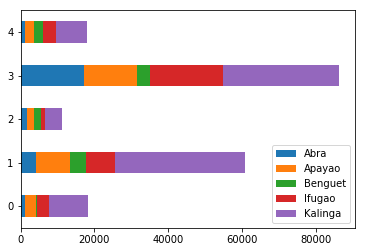

In [20]:
data.plot.barh(stacked=True)

### 直方图

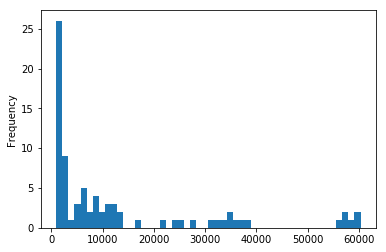

In [21]:
df['Abra'].plot.hist(bins=50)

### 饼状图

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202C2EC5160>],
      dtype=object)

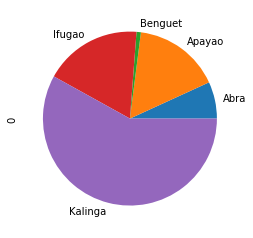

In [53]:
df.T[0].plot.pie(subplots=True)

## 将 df.DataFrame 转换成 Numpy 数据类型

In [55]:
df_numpy=df.values

In [57]:
df_numpy

array([[ 1243,  2934,   148,  3300, 10553],
       [ 4158,  9235,  4287,  8063, 35257],
       [ 1787,  1922,  1955,  1074,  4544],
       [17152, 14501,  3536, 19607, 31687],
       [ 1266,  2385,  2530,  3315,  8520],
       [ 5576,  7452,   771, 13134, 28252],
       [  927,  1099,  2796,  5134,  3106],
       [21540, 17038,  2463, 14226, 36238],
       [ 1039,  1382,  2592,  6842,  4973],
       [ 5424, 10588,  1064, 13828, 40140],
       [  981,  1311,  2560,  5078,  3466],
       [27366, 15093,  3039, 14206, 32395],
       [ 1100,  1701,  2382,  6750,  6233],
       [ 7212, 11001,  1088, 14774, 41634],
       [ 1048,  1427,  2847,  5526,  4402],
       [25679, 15661,  2942, 14452, 33717],
       [ 1055,  2191,  2119,  5882,  7352],
       [ 5437,  6461,   734, 10477, 24494],
       [ 1029,  1183,  2302,  6438,  3316],
       [23710, 12222,  2598,  8446, 26659],
       [ 1091,  2343,  2654,  9284,  8067],
       [ 7684, 10038,   974, 12666, 37094],
       [ 1192,  2668,  2899,  83

## 探索 pandas 中分组及统计操作

In [59]:
df.describe()

,Abra,Apayao,Benguet,Ifugao,Kalinga
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,12874.379747,16860.645570,3237.392405,12414.620253,30446.417722
std,16746.466945,15448.153794,1588.536429,5034.282019,22245.707692
min,927.000000,401.000000,148.000000,1074.000000,2346.000000
25%,1524.000000,3435.500000,2328.000000,8205.000000,8601.500000
50%,5790.000000,10588.000000,3202.000000,13044.000000,24494.000000
75%,13330.500000,33289.000000,3918.500000,16099.500000,52510.500000
max,60303.000000,54625.000000,8813.000000,21031.000000,68663.000000


In [65]:
df.groupby('Abra').agg('mean')

,Apayao,Benguet,Ifugao,Kalinga
Abra,,,,
927,1099.0,2796.0,5134.0,3106.0
981,1311.0,2560.0,5078.0,3466.0
1029,1183.0,2302.0,6438.0,3316.0
1039,1382.0,2592.0,6842.0,4973.0
1048,1427.0,2847.0,5526.0,4402.0
1055,2191.0,2119.0,5882.0,7352.0
1091,2343.0,2654.0,9284.0,8067.0
1100,1701.0,2382.0,6750.0,6233.0
1173,3714.0,3202.0,8973.0,5553.0
